# 1_data_prep_Barbie
streamlined notebook showing the current routine of grid loading and trimming before we save in the form used for training and testing pitchforks

- duplicated for different grids
- upstream of sandbox files used to test new data augmentations and make plots - do not mess around with grids here!

In [9]:
#misc
import pandas as pd
import numpy as np
import h5py
import random
import time
import os

#plotting
import matplotlib.pyplot as plt
import corner
from cmcrameri import cm
import seaborn as sns

## load in the grid:
 - Check headers against BASTA docs here: https://basta.readthedocs.io/en/latest/controls_parameters.html

In [10]:
barbie_h5 = h5py.File("/home/oxs235/datastorage/repos_data/ojscutt/pitchfork/data/Garstec_AS09_barbieMS.hdf5", 'r')

print(list(barbie_h5['grid/tracks/track0001']))

['BP_GAIA', 'FeH', 'FeHini', 'G_GAIA', 'LPhot', 'MMaxNucE', 'Mbcz', 'Mcore', 'McoreX', 'MeH', 'MeHini', 'PS', 'RMaxNucE', 'RP_GAIA', 'Rbcz', 'Rcore', 'RcoreX', 'TAMS', 'Teff', 'ZAMSLPhot', 'ZAMSTeff', 'age', 'alphaFe', 'alphaMLT', 'd02fit', 'd02mean', 'dage', 'dif', 'dnuAsf', 'dnuSer', 'dnufit', 'dnufitMos12', 'dnuscal', 'epsfit', 'epsfitMos12', 'errflagSer', 'eta', 'fdnuAsf', 'fdnuSer', 'gcut', 'logg', 'massfin', 'massini', 'modnum', 'name', 'numax', 'numaxAsf', 'nummodSer', 'osc', 'osckey', 'ove', 'radPhot', 'radTot', 'rho', 'rhocen', 'tau0', 'taubcz', 'tauhe', 'volume_weight', 'xcen', 'xini', 'xsur', 'ycen', 'yini', 'ysur', 'zcen', 'zini', 'zsur']


In [11]:
def track_df_gen(grid, track_ids, headers=['age', 'Teff', 'LPhot']):
    
    i=0
    for track_id in track_ids:
        track = grid['grid/tracks/track'+track_id]
        
        track_array = np.full(len(track[headers[0]]), int(track_id))

        for header in headers:
            track_array = np.column_stack((track_array, np.array(track[header])))
            
        if i == 0:
            tracks_array = track_array
            i=1
        else:
            tracks_array = np.vstack((tracks_array, track_array))

    return pd.DataFrame(tracks_array, columns = ['track_id']+headers)


## data prep:

### pre prep plots

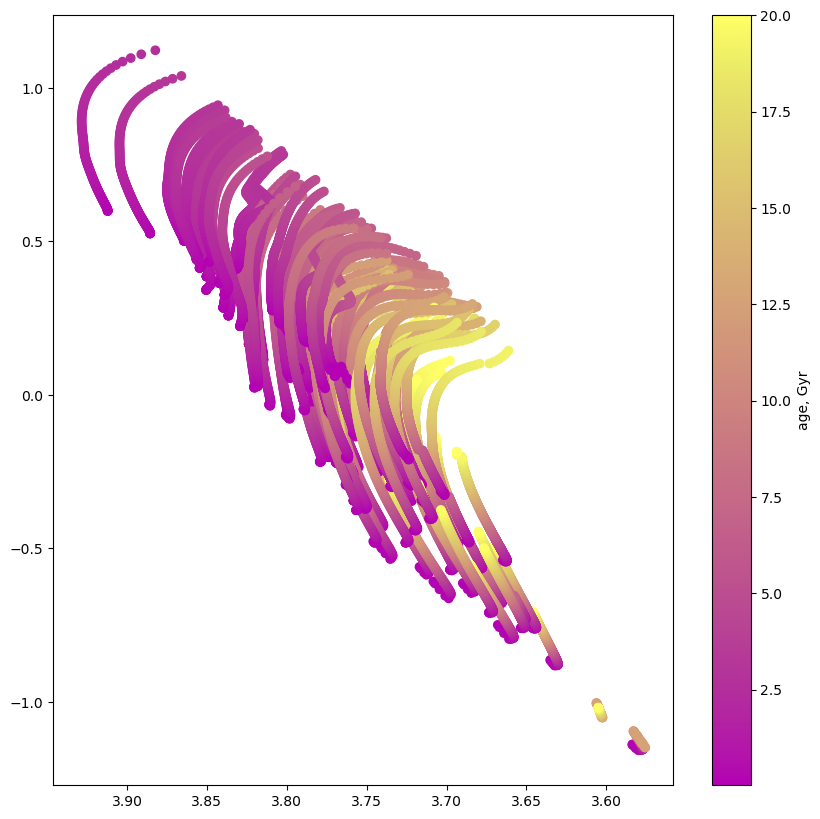

In [6]:
random.seed(42)
headers = ['age', 'Teff', 'LPhot']
track_ids = [track_name.replace('track', '') for track_name in random.sample(list(barbie_h5['grid/tracks']), 100)]

tracks_df = track_df_gen(barbie_h5,track_ids,headers)

plt.figure(figsize=(10,10))
plt.scatter(np.log10(tracks_df['Teff']), np.log10(tracks_df['LPhot']), c=tracks_df['age']/1000, cmap=cm.buda)
plt.xlabel

cbar = plt.colorbar()
cbar.set_label('age, Gyr')

plt.gca().invert_xaxis()

## post prep plots
show some tracks post prep - this is the dataset we'll use for training!

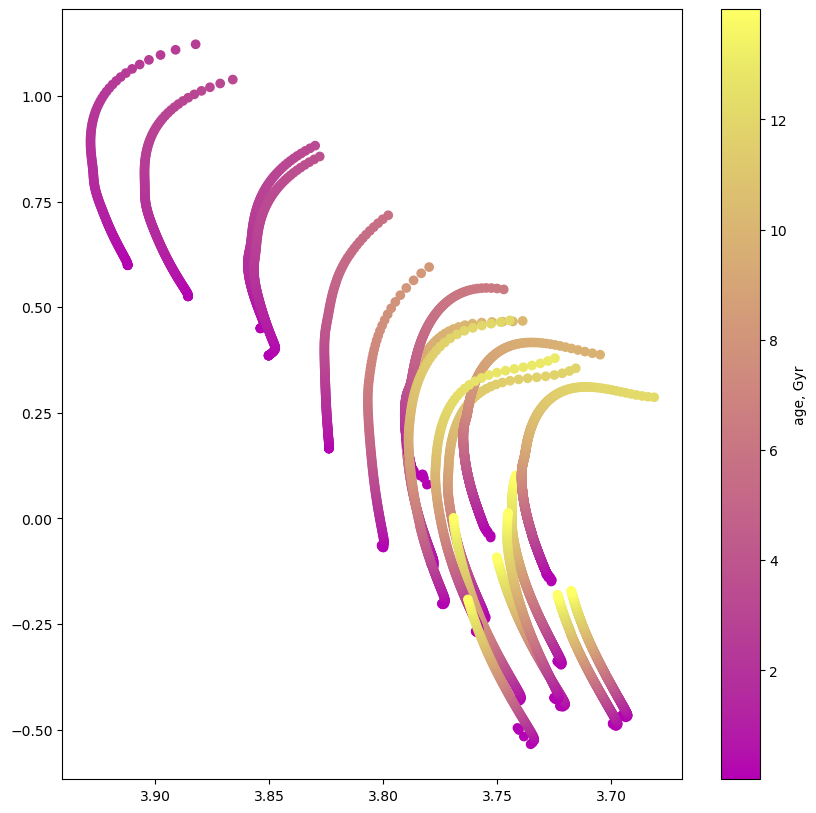

In [7]:
random.seed(42)
headers = ['age', 'Teff', 'LPhot', 'TAMS']
track_ids = [track_name.replace('track', '') for track_name in random.sample(list(barbie_h5['grid/tracks']), 25)]

tracks_df = track_df_gen(barbie_h5,track_ids,headers)

tracks_df = tracks_df[tracks_df['age'] <= 14e3]

tracks_df = tracks_df[tracks_df['TAMS'] >= 0]

plt.figure(figsize=(10,10))
plt.scatter(np.log10(tracks_df['Teff']), np.log10(tracks_df['LPhot']), c=tracks_df['age']/1000, cmap=cm.buda)
plt.xlabel

cbar = plt.colorbar()
cbar.set_label('age, Gyr')

plt.gca().invert_xaxis()

## save prepared grid:

In [8]:
headers = ['massini', 'zini', 'yini', 'alphaMLT', 'age', 'TAMS', 'radPhot', 'LPhot', 'Teff', 'zsur', 'numax', 'dnufit']

track_ids = [track_name.replace('track', '') for track_name in list(barbie_h5['grid/tracks'])]

tracks_df = track_df_gen(barbie_h5,track_ids, headers)
tracks_df = tracks_df[tracks_df['dnufit']!=0]
tracks_df = tracks_df[tracks_df['age'] <= 14e3]
tracks_df = tracks_df[tracks_df['TAMS'] >= 0]
tracks_df = tracks_df.drop(columns='TAMS')
tracks_df['age'] = tracks_df['age']/1000
tracks_df['numax'] = tracks_df['numax']*3094.852374694115
tracks_df

KeyboardInterrupt: 

In [6]:
tracks_df.describe()

,track_id,massini,zini,yini,alphaMLT,age,radPhot,LPhot,Teff,zsur,numax,dnufit
count,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000,792198.000000
mean,3000.065722,1.032772,0.017551,0.278219,1.800823,4.819359,1.151215,1.617280,5882.540532,0.015335,2668.940264,119.859951
std,1732.167359,0.103474,0.010244,0.022917,0.115516,3.459256,0.255999,1.031820,472.426889,0.009956,925.630210,31.801407
min,1.000000,0.800000,0.004004,0.240020,1.600098,0.018656,0.687935,0.271118,4701.918937,0.000323,763.276107,47.229410
25%,1501.000000,0.952000,0.008522,0.258311,1.701172,2.003543,0.962485,0.850404,5532.257625,0.006906,1963.104691,96.562514
50%,3001.000000,1.042000,0.015451,0.277295,1.801318,4.165208,1.101051,1.356173,5848.726977,0.013637,2649.618353,120.806019
75%,4501.000000,1.119000,0.025461,0.297773,1.900928,7.085151,1.284915,2.107733,6207.138200,0.022965,3343.707797,143.220807
max,5998.000000,1.200000,0.039924,0.319990,1.999951,13.999716,2.073636,9.833521,7732.911306,0.039918,5388.566188,212.573548


/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.02, 'barbie inputs')

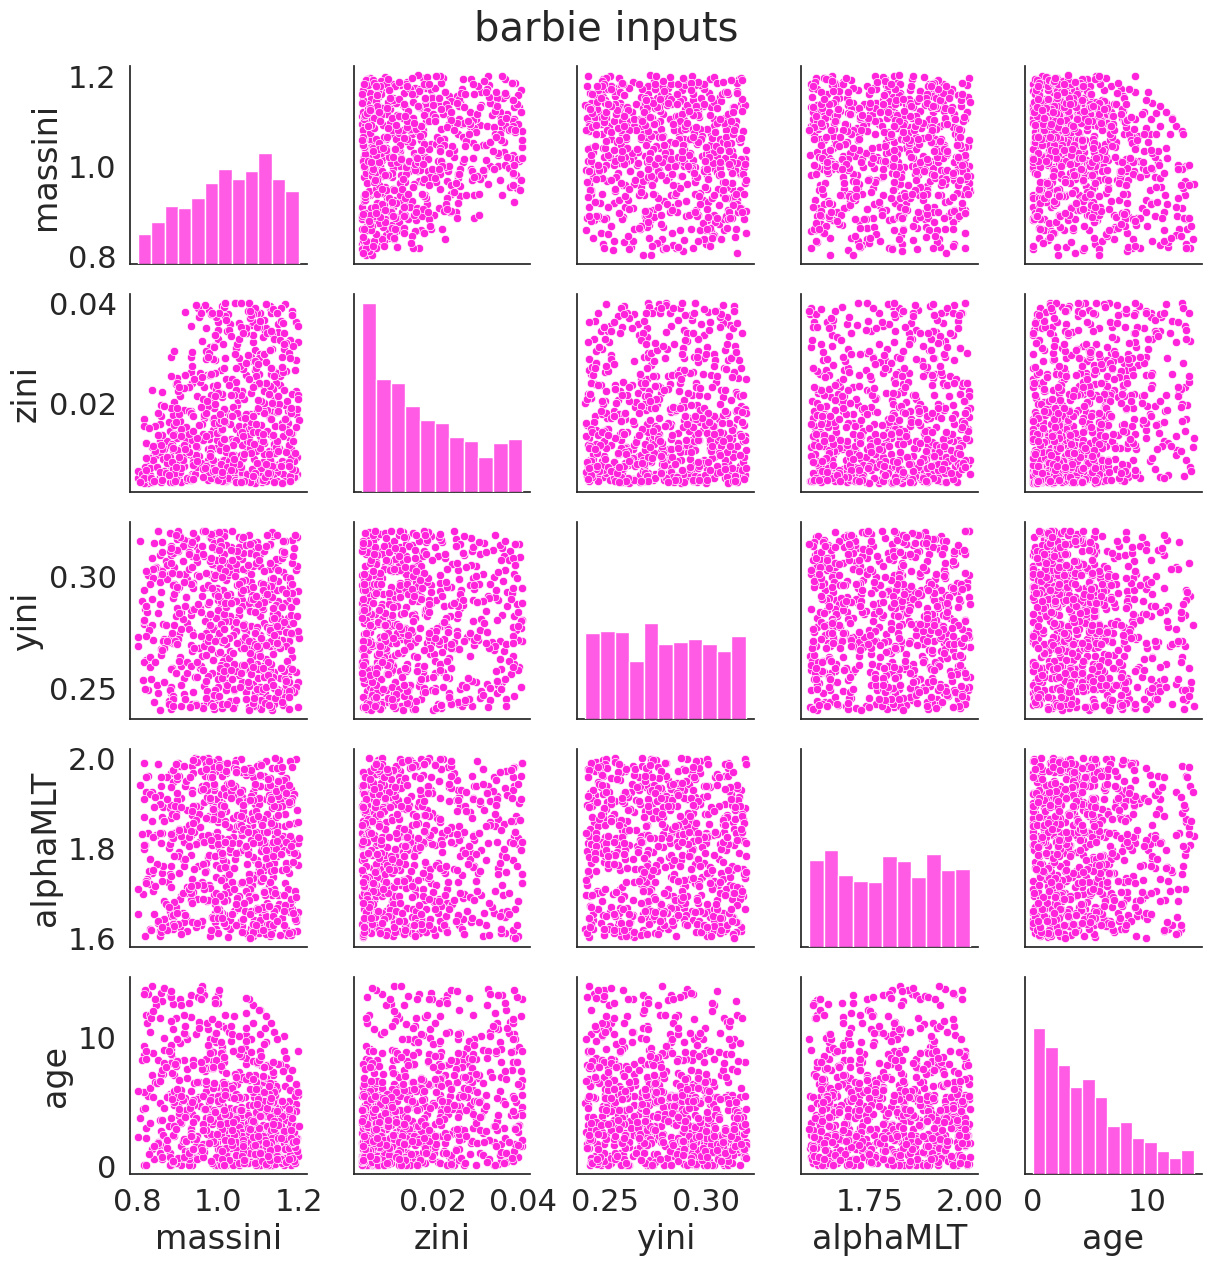

In [7]:
sns.set(font_scale=2)
sns.set_style(style="white")
sns.set_palette('spring')
ax = sns.pairplot(tracks_df[['massini','zini', 'yini', 'alphaMLT', 'age']].sample(frac=0.001), diag_kind="hist")
ax.fig.suptitle('barbie inputs', y=1.02)


/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/oxs235/miniconda3/envs/pitchfork/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.5, 1.02, 'barbie outputs')

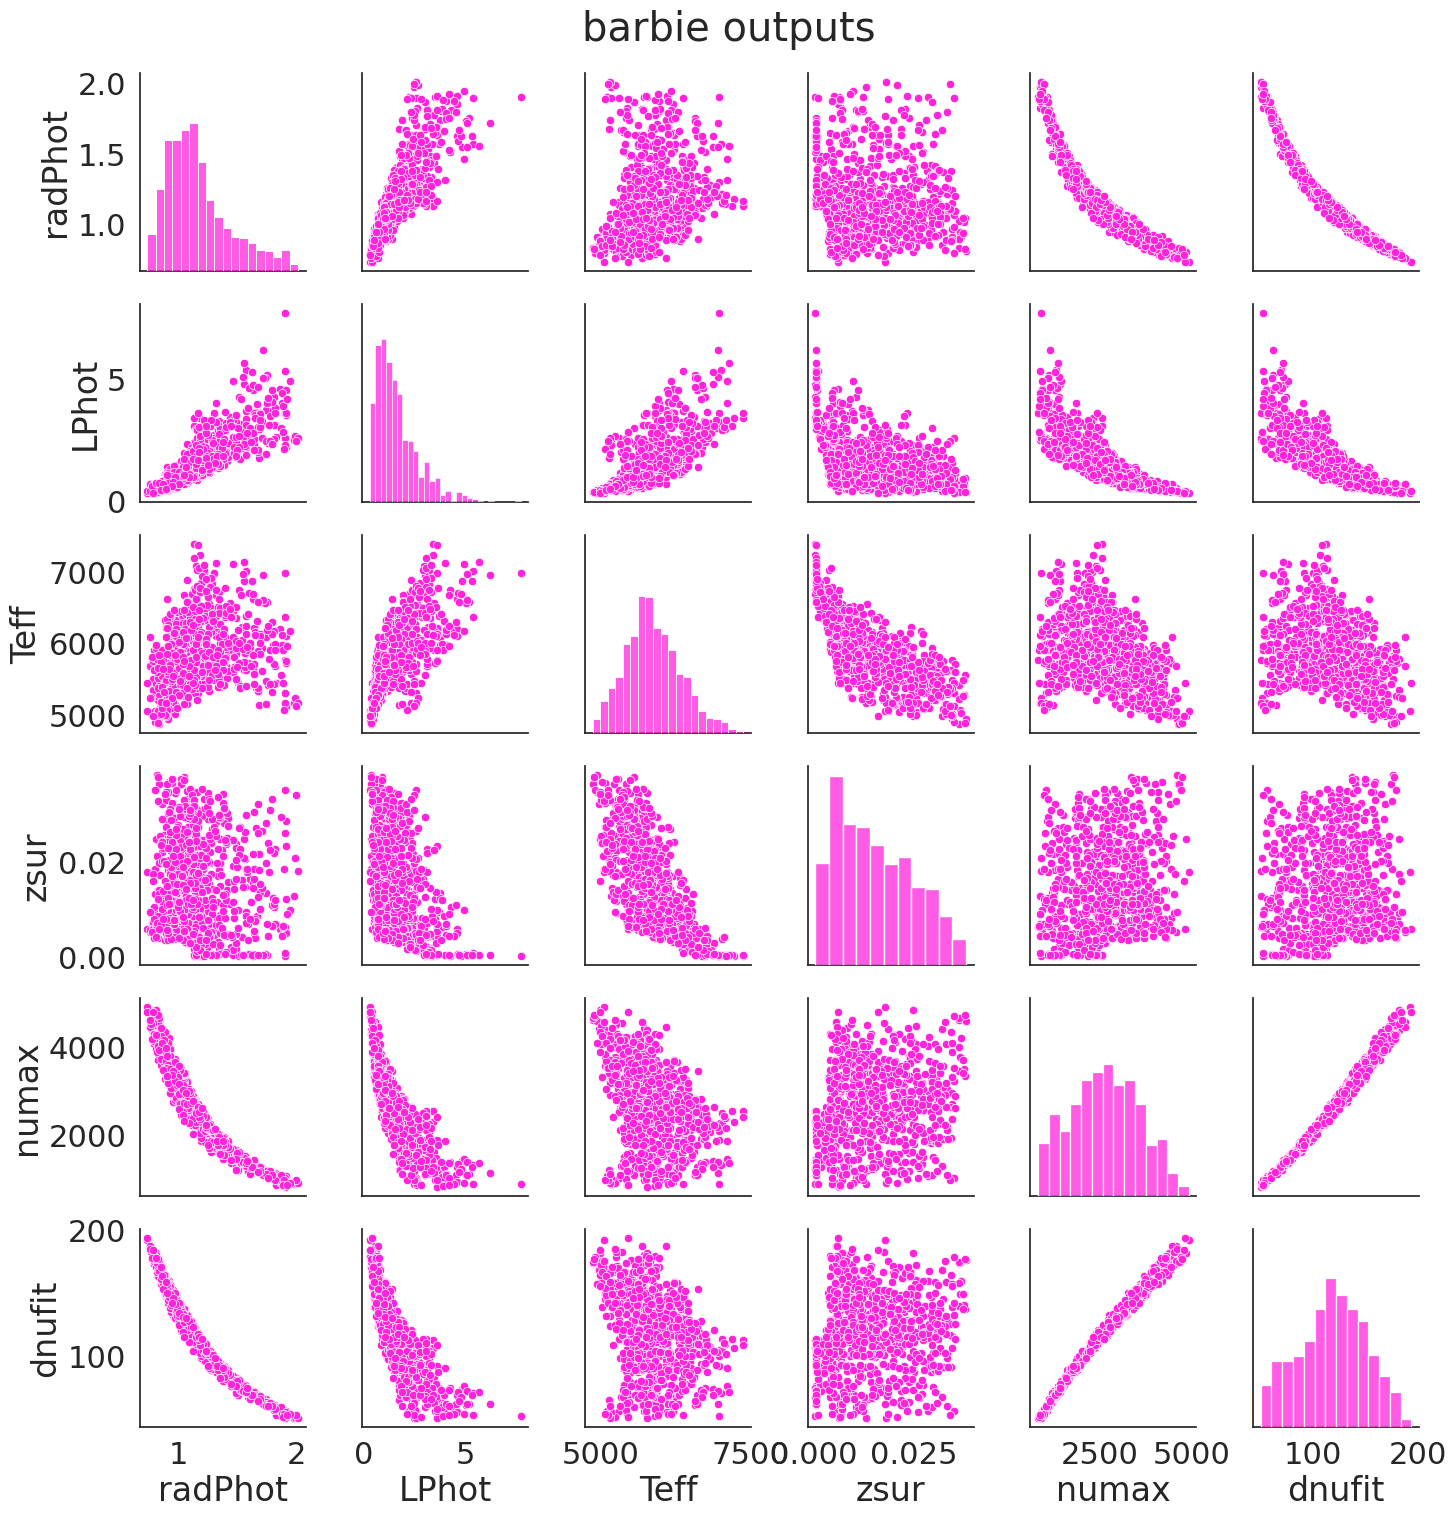

In [8]:
sns.set(font_scale=2)
sns.set_style(style="white")
sns.set_palette('spring')
ax = sns.pairplot(tracks_df[['radPhot', 'LPhot', 'Teff', 'zsur', 'numax', 'dnufit']].sample(frac=0.001), diag_kind="hist")
ax.fig.suptitle('barbie outputs', y=1.02)